## Initial data choice

## Fetching the data

In [19]:
import numpy as np
import pandas as pd

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [20]:
lines = pd.read_csv('out_data_b.txt').to_numpy()

t = lines[0::4].astype(float)
a_1 = lines[1::4]
a_2 = lines[2::4]
N_particles = lines[3::4].astype(int)

mxv_1 = np.array([x.split(' ') for x in a_1.ravel()],dtype=float)
mxv_2 = np.array([x.split(' ') for x in a_2.ravel()],dtype=float)

print(t.shape)
#print(mxv_1)
#print(mxv_2)
#print(N_particles)

(999, 1)


Now i will reshape mxv_1 and 2 to get the arrays of mass, position and velocity and i will define the two masses as dictionaries.

In [3]:
m_1 = {
    "m": mxv_1[:,0],
    "x": mxv_1[:,1:4][:,0],
    "y": mxv_1[:,1:4][:,1],
    "z": mxv_1[:,1:4][:,2],
    "pos": mxv_1[:,1:4],
    "v_x": mxv_1[:,4:8][:,0],
    "v_y": mxv_1[:,4:8][:,1],
    "v_z": mxv_1[:,4:8][:,2],
    "vel": mxv_1[:,4:8]
}

m_2 = {
    "m": mxv_2[:,0],
    "x": mxv_2[:,1:4][:,0],
    "y": mxv_2[:,1:4][:,1],
    "z": mxv_2[:,1:4][:,2],
    "pos": mxv_2[:,1:4],
    "v_x": mxv_2[:,4:8][:,0],
    "v_y": mxv_2[:,4:8][:,1],
    "v_z": mxv_2[:,4:8][:,2],
    "vel": mxv_2[:,4:8]
}

#print(m_1["z"])

## Results

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

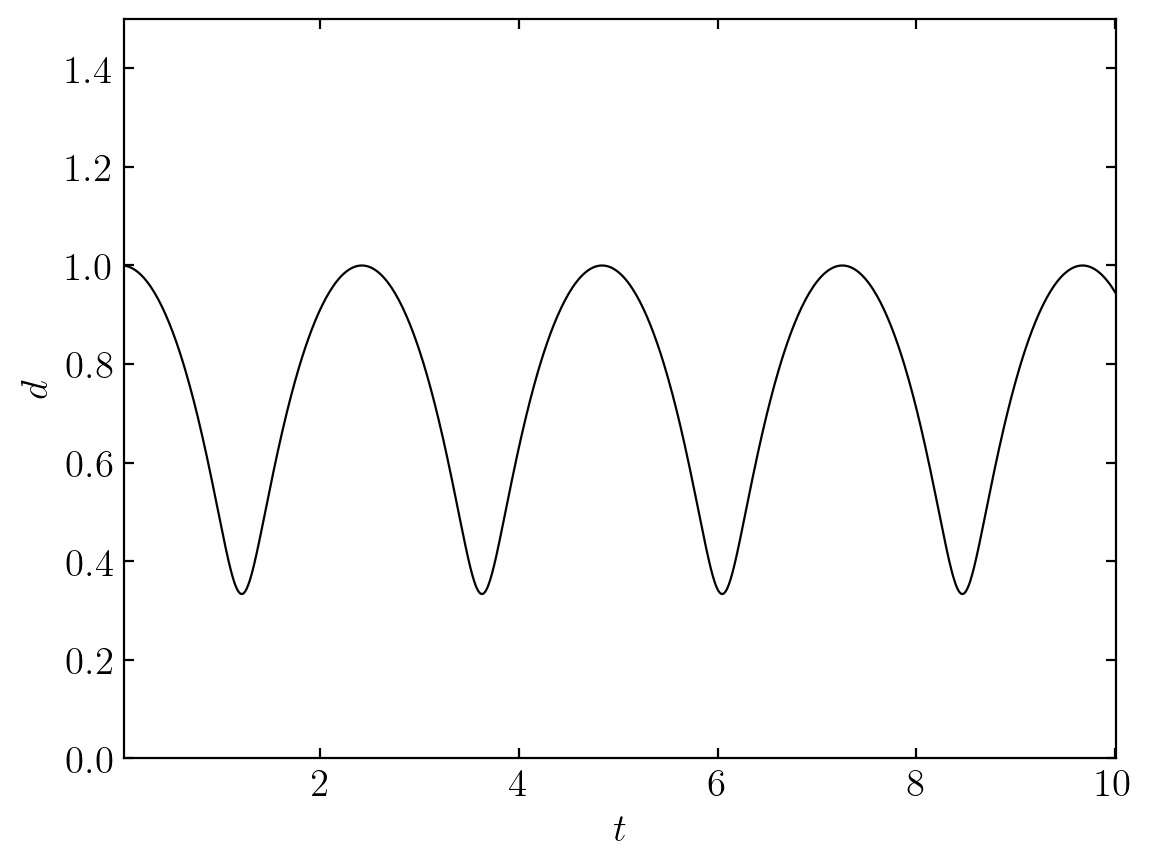

In [5]:
# plotting the distance
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

d = dist(m_1['x'], m_1['y'], m_1['z'], m_2['x'], m_2['y'], m_2['z'])
plt.plot(t, d, c = 'black', lw = .8)
plt.ylim([0,1.5])

plt.xlabel(r'$t$')
plt.ylabel(r'$d$')

plt.show()

## Problem Quantities

## Omega

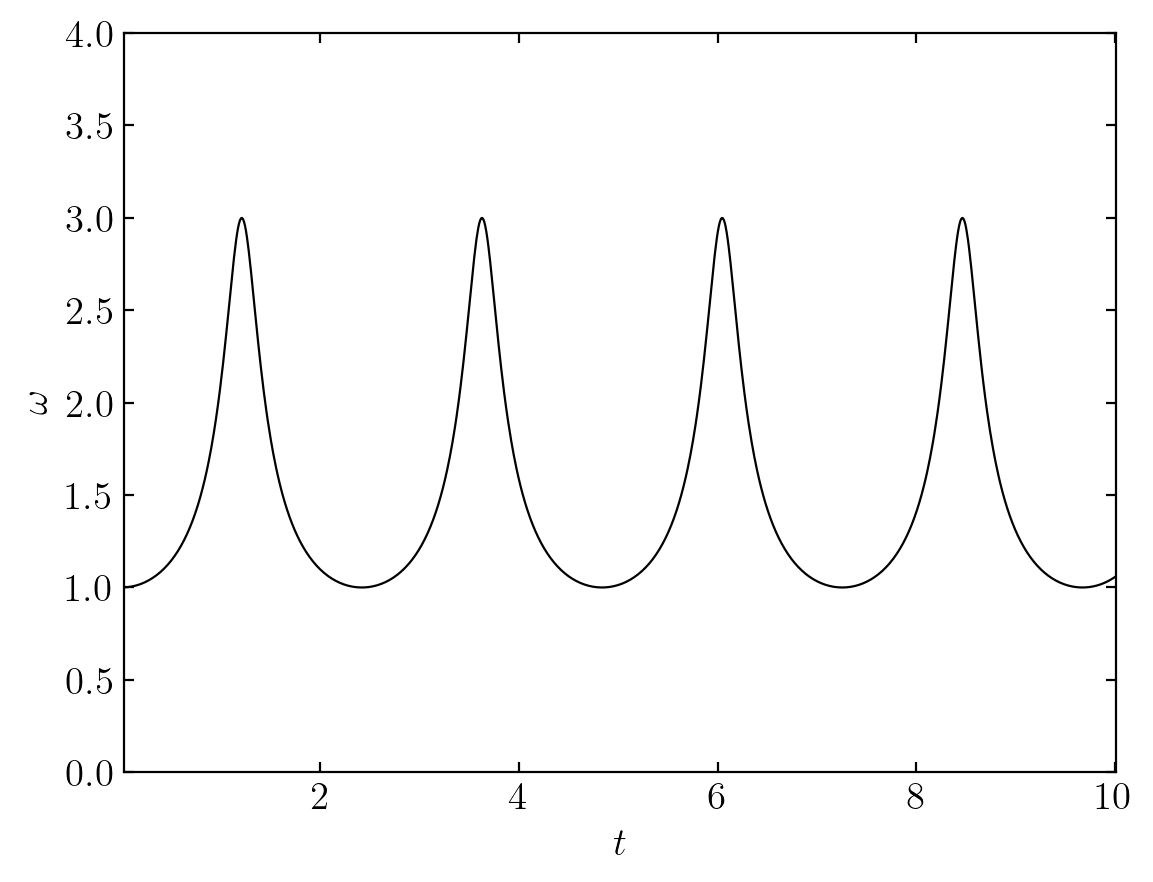

In [8]:
omega = np.sqrt(m_1['m']*m_2['m']/d**2) #G=1
M  = m_1['m'] + m_2['m']
mu = m_1['m'] * m_2['m']/M

L = mu*d*omega #constant = sqrt(m_1*m_2)
L = L[0]
l = L/mu[0]

plt.plot(t, omega, c = 'black', lw = .8)
plt.ylim(0,4)

plt.xlabel(r'$t$')
plt.ylabel(r'$\omega$')

plt.show()

## The potential

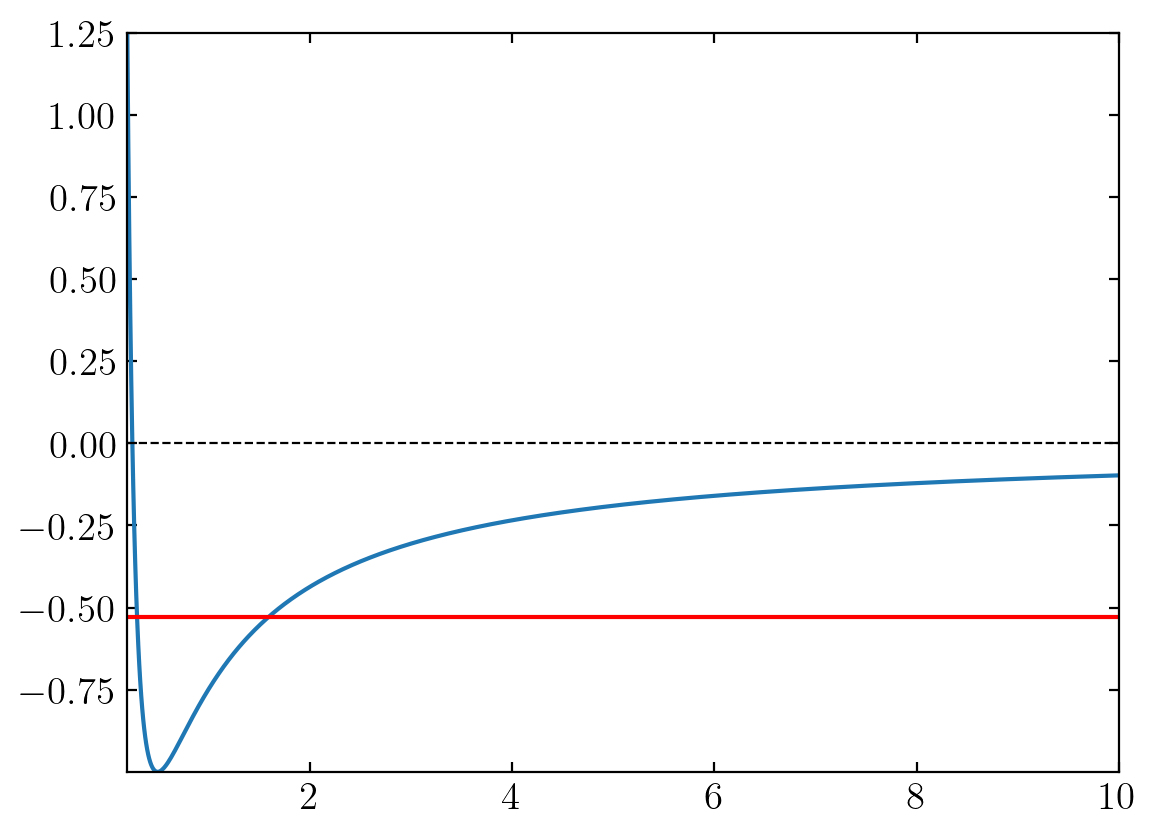

In [18]:
v_1 = np.linalg.norm(m_1['vel'])
v_2 = np.linalg.norm(m_2['vel'])
v_cm = 1 #only v_z = 0.5 on both

U = lambda r: -m_1["m"]*m_2["m"]/r + L**2/(2*mu*r**2)
E = 1/2*mu*v_cm**2 + U(d) #dovrebbe conservarsi


r = np.linspace(.2,10,len(t))
plt.plot(r, U(r));
#plt.plot(d, U(d), 'red');
plt.axhline(y = 0, color = 'black', linestyle = 'dashed', lw = .8);
plt.axhline(y = E[-1], color = 'red');

## Eccentricity

In [10]:
# assuming A = 1
A = 1
G = 1
e = A*l**2/(G*M[0])

print(e)

0.5


## Trajectories

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

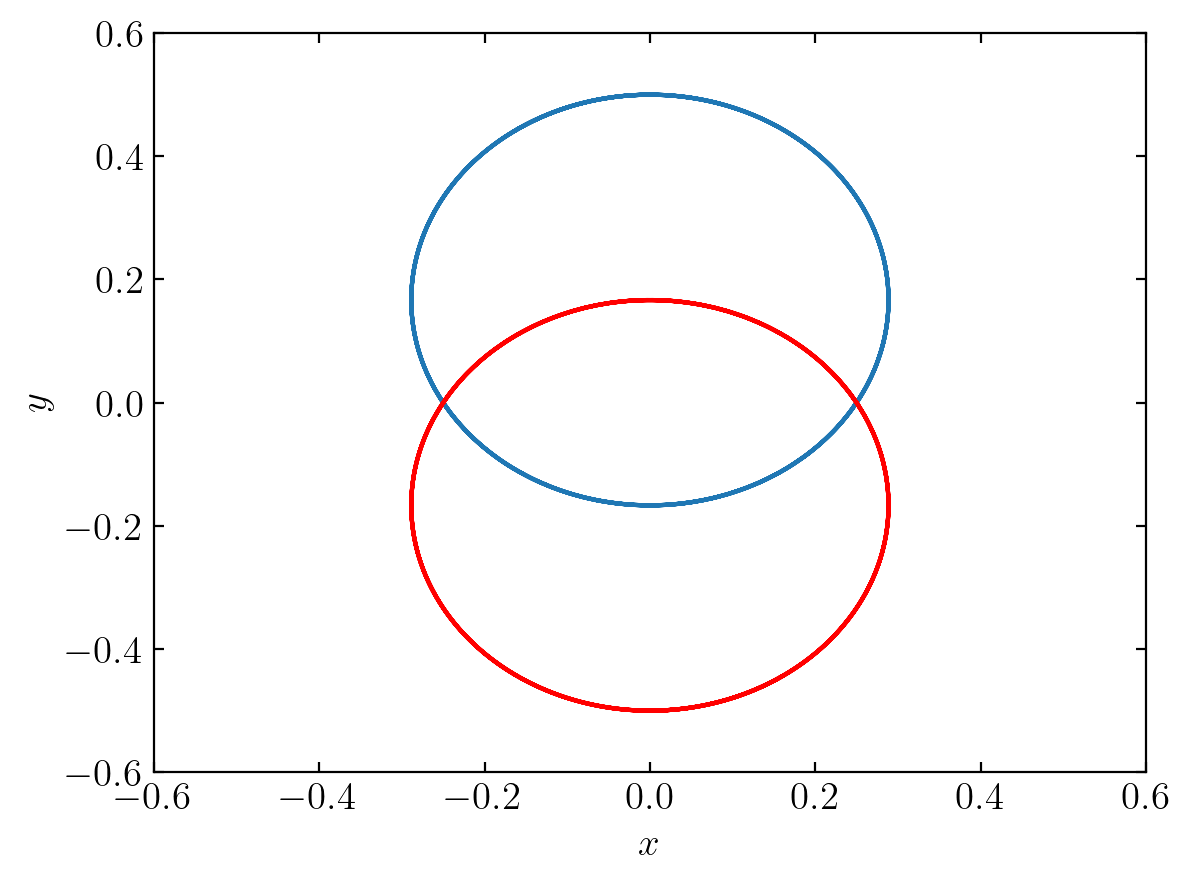

In [12]:
plt.plot(m_1["x"], m_1["y"], label='curve in (x, y)');
plt.plot(m_2["x"], m_2["y"], label='curve in (x, y)', color = 'red');
plt.xlim(-.6,.6)
plt.ylim(-.6,.6);

plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

### Eccentricity of the orbits

In [13]:
a_1 = (np.max(m_1["y"]) - np.min(m_1["y"]))/2
a_2 = (np.max(m_2["y"]) - np.min(m_2["y"]))/2
b_1 = (np.max(m_1["x"]) - np.min(m_1["x"]))/2
b_2 = (np.max(m_2["x"]) - np.min(m_2["x"]))/2

e1 = np.sqrt(1 - (b_1/a_1)**2)
e2 = np.sqrt(1 - (b_2/a_2)**2)

print(e1, e2)

0.4999646359647372 0.4999646359647372


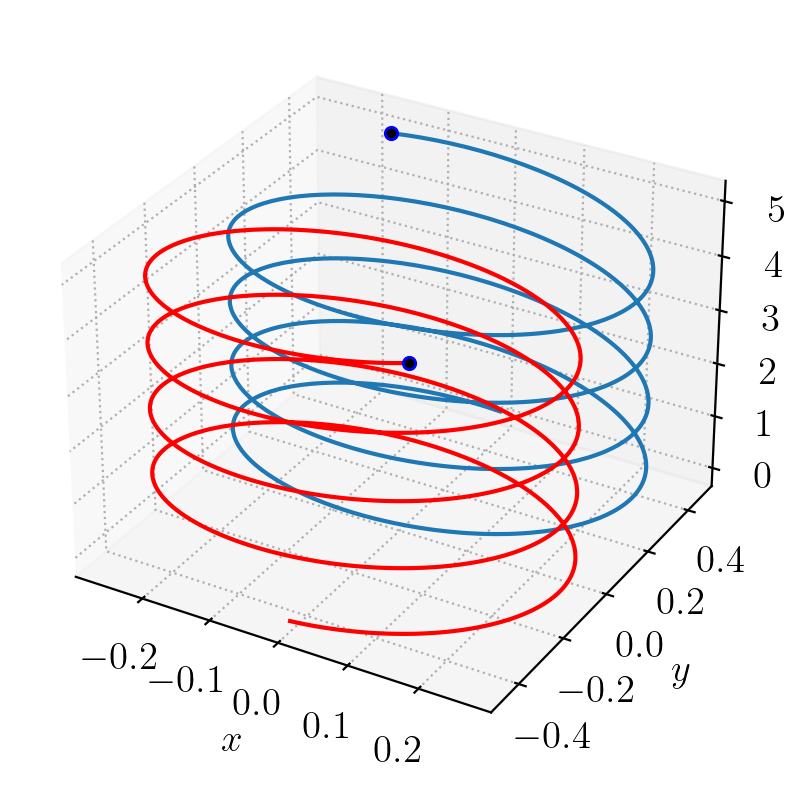

In [14]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(m_1["x"], m_1["y"], m_1["z"], zdir='z', label='curve in (x, y)');
ax.plot(m_2["x"], m_2["y"], m_2["z"], zdir='z', label='curve in (x, y)', color = 'red');
ax.scatter(m_1["x"][-1], m_1["y"][-1], m_1["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin
ax.scatter(m_2["x"][-1], m_2["y"][-1], m_2["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');

# Animation

In [15]:
x_1 = m_1["x"]
y_1 = m_1["y"]
z_1 = m_1["z"]

x_2 = m_2["x"]
y_2 = m_2["y"]
z_2 = m_2["z"]

numDataPoints = len(t)

In [16]:
def update(num):
    #print(f"{num} ", end="")
    
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(x_1[:num+1], y_1[:num+1], 
              z_1[:num+1])              # Updating Point Location
    ax.plot3D(x_2[:num+1], y_2[:num+1], 
              z_2[:num+1], c='red')
    ax.scatter(x_1[num], y_1[num], z_1[num], 
               c='black', marker='o')    # Adding Constant Origin
    ax.scatter(x_2[num], y_2[num], z_2[num], 
               c='black', marker='o')    # Adding Constant Origin
    
    #ax.plot3D(x_1[0], y_1[0], z_1[0], marker='o', c='black')    # Setting Axes Limits
    #ax.plot3D(x_2[0], y_2[0], z_2[0], marker='o', c='black')    # Setting Axes Limits
    
    #ax.set_xlim3d([-.6, .6])
    #ax.set_ylim3d([-.6, .6])
    #ax.set_zlim3d([0, 5])

    # Adding Figure Labels
    #ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 #decimals=2)) + ' sec')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$');

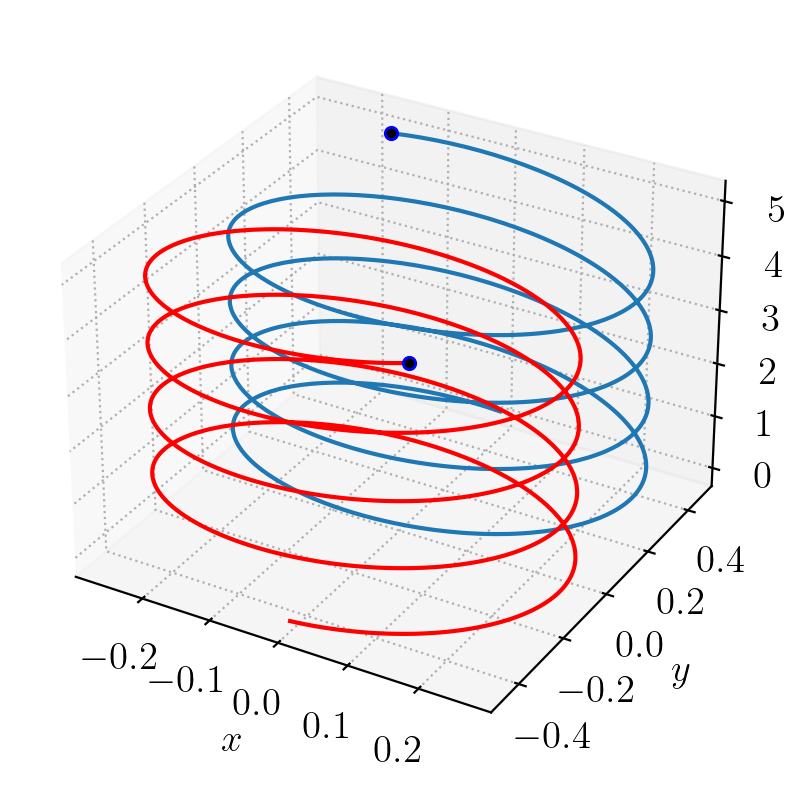

In [17]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update, interval=10,   
                                   frames=numDataPoints)

# Saving the Animation
f = r"animation1.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()

# Equivalent system